# Homework 1


This class will be taught in Python and will use some of the most common libraries available for machine learning and data science. This homework's goal is to make sure you have the necessary background to succeed in this class and to confirm all the essential libraries are installed. Please answer the proposed questions in a separate document and attach a PDF version to your zip folder before submitting.

Please note how long (ie 2 hours) you took to finish this assignment as it will be asked at the end of the notebook. This is important to measure how difficult the homeworks are.

## Exercise 1 - Python 

We initialize a list with 1000 random numbers below. Implement the following functions using python (do not use any library for this part of the exercise, you should implement from scratch).

In [1]:
from random import randrange, seed
from typing import *
seed(0) # we define a fixed seed so we can replicate our experiments
random_numbers = [randrange(10) for _ in range(1000)] # we generate 1000 random integers ranging from 0 to 9

In [2]:
# Complete the following functions
def compute_most_frequent(numbers_list:List, top_k:int=3) -> Dict:
    # K is the size of the dictionary you need to return. Keys should be the integers and values should be the counts
    
    counter = {}
    for v in numbers_list:
        if v in counter:
            counter[v] += 1
        else:
            counter[v] = 1
    sd = sorted(counter.items(), key= lambda kv: kv[1], reverse = True)
    return dict(sd[:top_k])

def compute_mean(numbers_list:List) -> float:
    return sum(numbers_list) / len(numbers_list)

def compute_median(numbers_list:List) -> float:
    sorted_list = sorted(numbers_list)
    n = len(numbers_list)
    if n % 2 == 0:
        return (sorted_list[n // 2 - 1] + sorted_list[n // 2]) / 2
    else:
        return sorted_list[n // 2 + 1]

def compute_standard_deviation(number_list:List) -> float:
    mean = compute_mean(number_list)
    sq_sum = sum((s - mean) ** 2 for s in number_list)
    return math.sqrt(sq_sum / len(number_list))

def generate_histogram_list(numbers_list:List)->List:
    counter = {}
    for v in numbers_list:
        if v in counter:
            counter[v] += 1
        else:
            counter[v] = 1
    sd = sorted(counter.items(), key= lambda kv: kv[0])
    return list(dict(sd).values())

Now, using any library you want (ie. Numpy, Sklearn, collections), implement the same functions. They should pass the tests below.

In [8]:
# import the required libraries here
import collections
import math
import numpy as np

In [9]:
# Complete the following functions using imported libraries
def compute_most_frequent_using_external_library(numbers_list:List, top_k:int=3) -> Dict:
    # K is the size of the dictionary you need to return. Keys should be the integers and values should be the counts
    s = collections.Counter(numbers_list).most_common(top_k)
    return {k: v for (k,v) in s}

def compute_mean_using_external_library(numbers_list:List) -> float:
    return np.mean(numbers_list)

def compute_median_using_external_library(numbers_list:List) -> float:
    return np.median(numbers_list)

def compute_standard_deviation_using_external_library(numbers_list:List) -> float:
    return np.std(numbers_list)

def generate_histogram_list_using_external_library(numbers_list:List)->List:
    hist, bin_edges = np.histogram(numbers_list, range(max(numbers_list)+2))
    return list(hist)

In [10]:
# Sanity check tests:
assert compute_most_frequent(random_numbers, top_k=5) == compute_most_frequent_using_external_library(random_numbers, top_k=5)
assert compute_mean(random_numbers) == compute_mean_using_external_library(random_numbers)
assert compute_median(random_numbers) == compute_median_using_external_library(random_numbers)
assert compute_standard_deviation(random_numbers) == compute_standard_deviation_using_external_library(random_numbers)
assert generate_histogram_list(random_numbers) == generate_histogram_list_using_external_library(random_numbers)

## Exercise 2 - Visualization

Using the output from your `compute_most_frequent` function, use Matplotlib and/or seaborn to generate 3 different plots (ie.histogram).

In [3]:
# import the necessary libraries here
from matplotlib import pyplot as plt

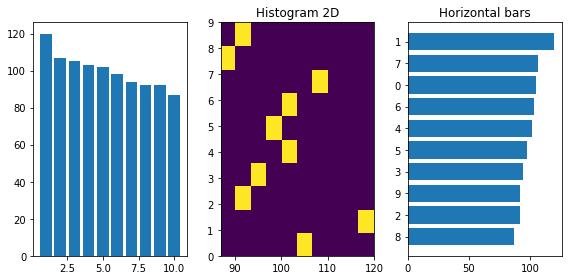

In [5]:
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

axs[0].set_title("Histogram")
fig, axs = plt.subplots(1, 3, figsize=(8, 4), tight_layout=True)
axs[0].bar(range(1, len(data)+1), list(data.values()))

data = compute_most_frequent(random_numbers, top_k=10)
axs[1].set_title("Histogram 2D")
axs[1].hist2d(list(data.values()), list(data.keys()))

axs[2].set_title("Horizontal bars")
axs[2].barh(range(len(data)), list(data.values()))
axs[2].set_yticks(range(len(data)))
axs[2].set_yticklabels(list(data.keys()))
axs[2].invert_yaxis()

### Question 1:
What can you tell us about the data and the function used to generate it?

### Answer 1:
Data is random and equaly distributed.

## Exercise 3 - Numpy

We initialize 3 matrices with random numbers. Complete the code segments

In [7]:
import numpy as np
np.random.seed(0) # we set numpy's seed so we can reproduce results

random_matrix_A = np.random.rand(2,3)
random_matrix_B = np.random.rand(3,2)
random_matrix_C = np.random.rand(3,6)

In [13]:
# Write code below to multiply matrices A and B
AB_mult = random_matrix_A.dot(random_matrix_B)

# Write code below to multiply matrices A and C
AC_mult = random_matrix_A.dot(random_matrix_C)

# Write code below to multiply the squares of AB_mult and AC_mult
AB_squared_mult_AC_squared = (AB_mult ** 2).dot(AC_mult ** 2)

# Compute the transpose of the matrix  AB_squared_mult_AC_squared
AB_squared_mult_AC_squared_transpose = AB_squared_mult_AC_squared.T

### Question 2:
What is the shape of the `AB_squared_mult_AC_squared_transpose` variable?

### Answer 2:
shape is (2, 2)

## Exercise 4 - Pandas and Sklearn

Following the methods at https://scikit-learn.org/stable/datasets/index.html, load the Iris dataset into a Pandas dataframe(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# load the iris dataset with both features and labels into a Pandas DataFrame
iris_bunch = load_iris()
iris_dataframe = pd.DataFrame(iris_bunch['data'], columns=iris_bunch['feature_names'])

Compute the count, mean, standard deviation, min and max values for all the features. You can use the functions you implemented or use Pandas built-in functions to do it (recommended).

In [3]:
# Generate and print the statistics for your dataset.
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Question 3:

    a) Which of the features has the largest standard deviation?
    b) What is the average sepal width(cm) for the setosa class?

### Answer 3:
    a) 'petal length' has the largest STD (1.765298)
    b) The average sepal width for sentosa class is 3.428 cm

In [4]:
# Use this area to run any commands you need to answer the questions above.

sentosa_index = list(iris_bunch.target_names).index("setosa")
sentosa_data = iris_bunch["data"][iris_bunch.target == sentosa_index]
sentosa_dataframe = pd.DataFrame(sentosa_data, columns=iris_bunch['feature_names'])
sentosa_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


Plot a histogram with the values for petal length (cm) for the virginica

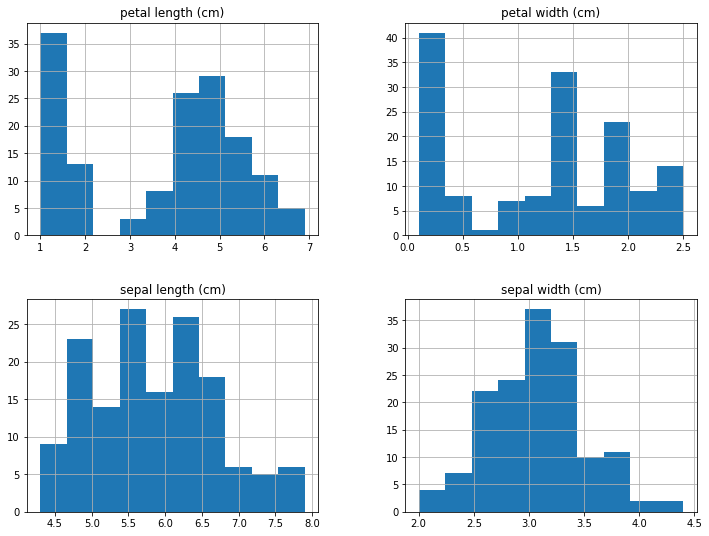

In [8]:
# Plot a histogram of the feature values
df.hist(figsize=(12,9));

In the next cells, we will train your first machine learning algorithm.  Do not worry if you do not understand it yet, we will cover it in the future. The goal here is to check if all the libraries are installed correctly and to get you started with Machine Learning.

Create a train and test split for the data using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [9]:
# Create the train and test splits
from sklearn.model_selection import train_test_split

X = df.values
y = iris_bunch['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Fit any classification model from sklearn (example:https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py) to the training data.

In [12]:
# Fit the model to your training data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now, generate predictions on your test data and print the classification report (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of your results

In [13]:
# generate predictions
y_pred = lr.predict(X_test)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### Question 4:
This is the end of this assignment. How long did you take to finish it?

### Answer 4:
20 hours